In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom



#2 Distributions

dataset: [GSS](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjF_cnpteX8AhVlm1YBHdBWD3IQFnoECAwQAQ&url=https%3A%2F%2Fgss.norc.org%2F&usg=AOvVaw1yp3I753i-Z5qjxBbaIpYK)

GSS: General Social Survey

* Annual sample of U.S. population.
* Asks about demographics, social and political beliefs.
* Widely used by policy makers and researchers.

In [ ]:
gss = pd.read_hdf('/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Exploratory Data Analysis in Python/gss.hdf5','gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


##Probability mass functions

Distribution of `educ` :which records the number of years of education for each respondent. 

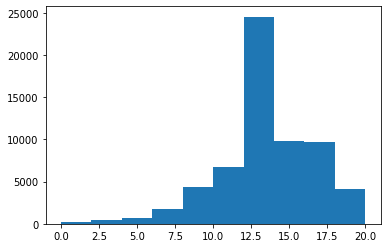

In [ ]:
educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ')
plt.show()

Như thấy ở trên Histogram không phải cách lý tưởng để visualize
##PMF: probability mass function

Show unique value in the dataset and how often they appear

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the

###[empiricaldist](https://pypi.org/project/empiricaldist/) library.

In [ ]:
pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12125 sha256=06a841238a2f25fa49074080ca7616547fe69496a2eb99ff8003098160038edc
  Stored in directory: /root/.cache/pip/wheels/c2/3f/cf/74b5adbcea4efaae43ce168e622e3eb8dbc1251d5d730dd245
Successfully built empiricaldist


In [ ]:
from empiricaldist import Pmf

In [ ]:
#Provided in 1.Read, clean, and validate
pmf_educ = Pmf(educ, normalize = True) #1 arg take any kind of sequence, normalize = T/F 
pmf_educ.head()

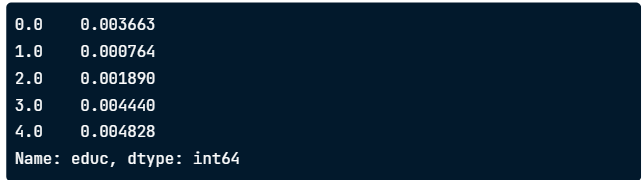

In [ ]:
pmf_educ[12]

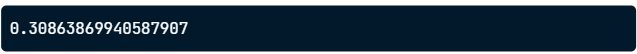

In [ ]:
pmf_educ.bar(label= 'educ') #bar chart in the Pmf class
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

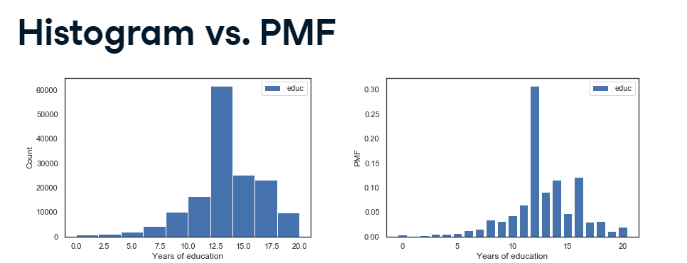

###Make a Pmf
Make a PMF
The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the [empiricaldist](https://pypi.org/project/empiricaldist/) library.

In [ ]:
# Compute the PMF for year
pmf_year = Pmf(gss['year'], normalize =False)

# Print the result
print(pmf_year)

In [ ]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

``` có thể dùng .bar() hay .plot()```

##Cumulative distribution functions or **CDF**

if you draw a random value from a distribution - what's the chance of getting x, for any given value of x. The CDF is similar; if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.

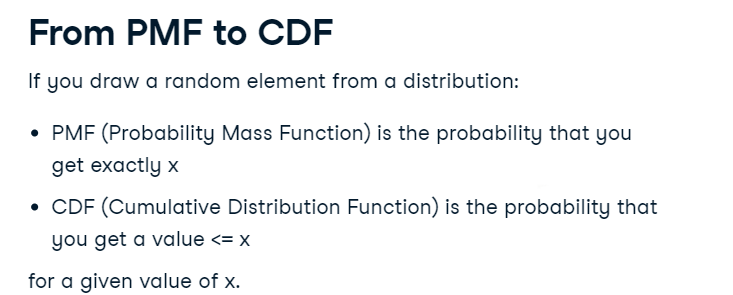

In [ ]:
cdf = Cdf(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

The cdf object can be used as a function

```
q = 51
p = cdf(q)
print(p)
 >0.66                              
```
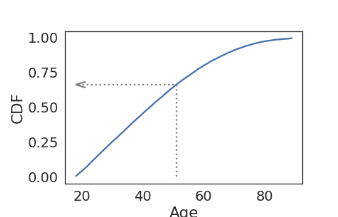

The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q.

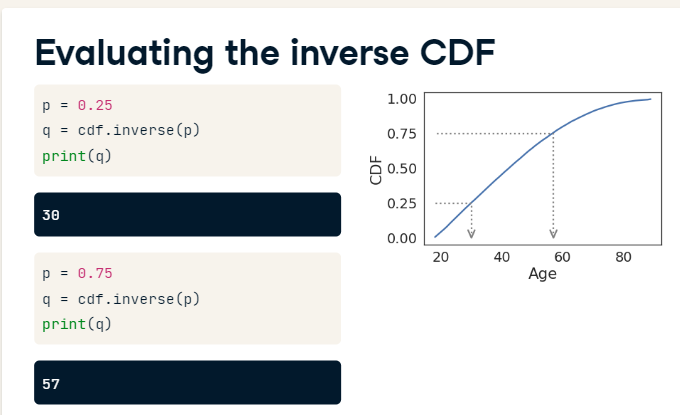

Compute IQR

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.

In [ ]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

Plot a CDF

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

In [ ]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

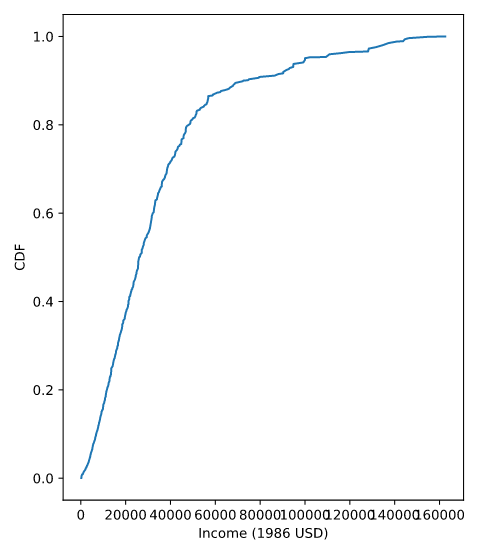

##Comparing distribution

In [ ]:
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]
Pmf(male_age).plot(label = 'Male')
Pmf(female_age).plot(label = 'Female')
plt.xlabel('Age(years)')
plt.ylabel('Count')
plt.show()

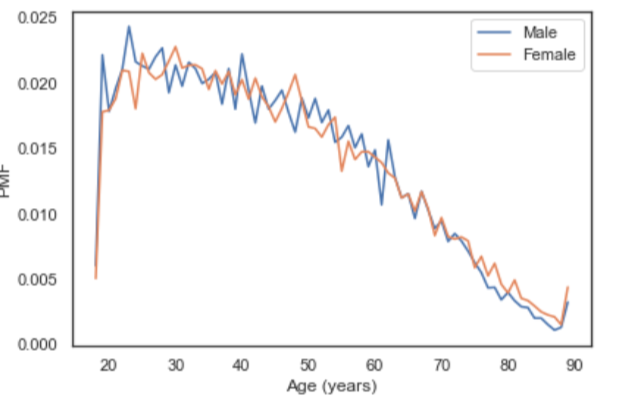

In [ ]:
Cdf(male_age).plot(label = 'male')
Cdf(female_age).plot(label = 'female')

plt.xlabel('Age(years)')
plt.ylabel('Count')
plt.show()

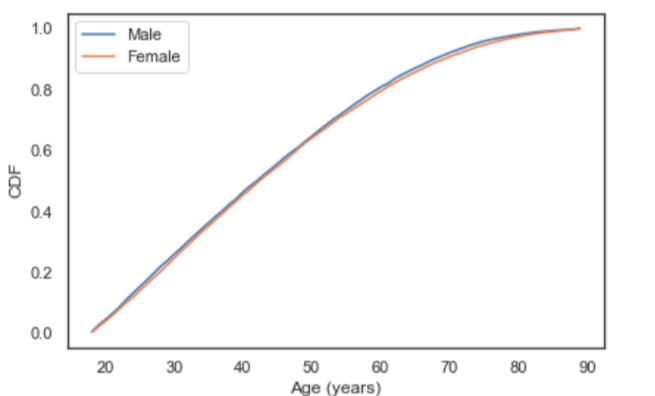

The distribution are nearly identical

###Income distribution

In [ ]:
income = gss['realinc']
pre95 = gss['year'] < 1995

Pmf(income[pre95]).plot(label = "Before 1995")
Pmf(income[~pre95]).plot(label = "After 1995")



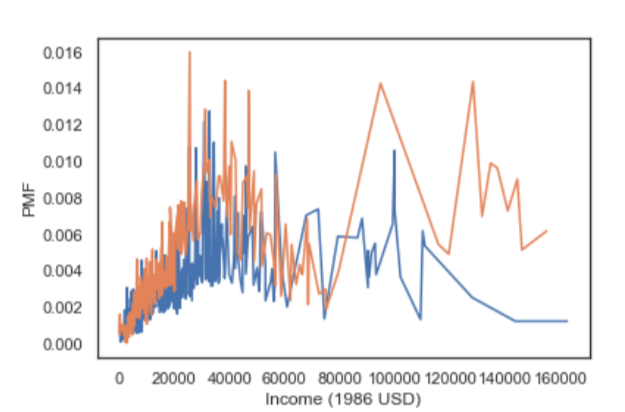

In [ ]:
Cdf(income[pre95]).plot(label = "Before 1995")
Cdf(income[~pre95]).plot(label = "After 1995")

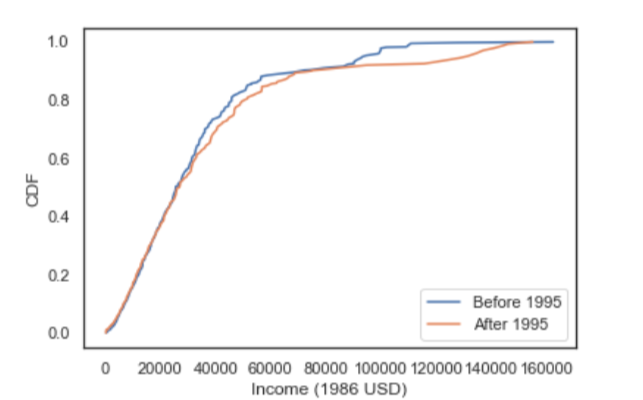

Extract education levels

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

In [ ]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())



Plot income CDFs

Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:



In [ ]:
income = gss['realinc']

# Plot the CDFs
Cdf(high).plot(label='High school')
Cdf(assc).plot(label='Associate')
Cdf(bach).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

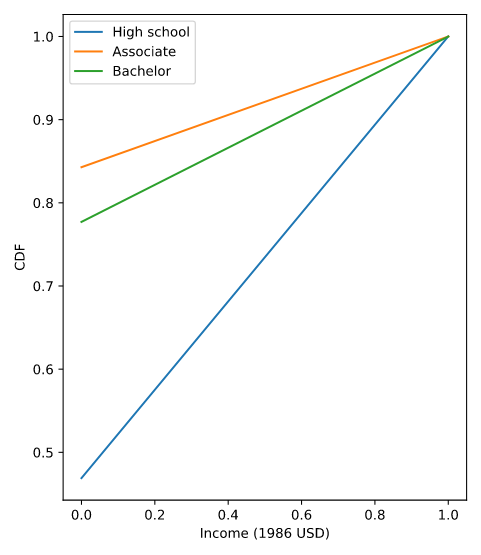

In [ ]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

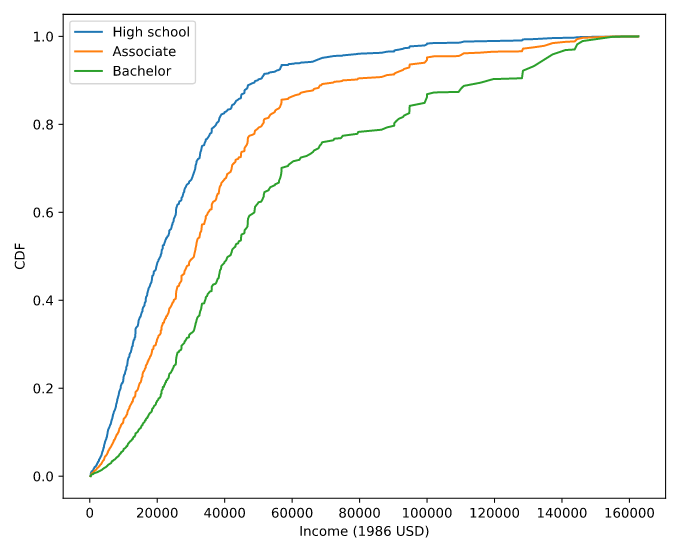

##Modeling distributions

###Normal distribution


In [ ]:
sample = np.random.normal(size= 1000)
Cdf(sample).plot()

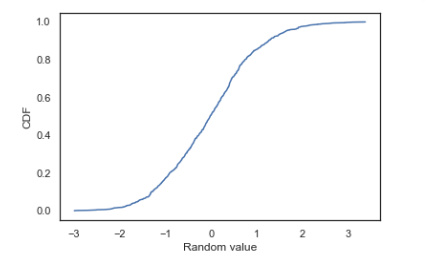

###The bell curve
```
from scipy.stats import norm
xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs)
plt.plot(xs,ys, color = 'gray')
```
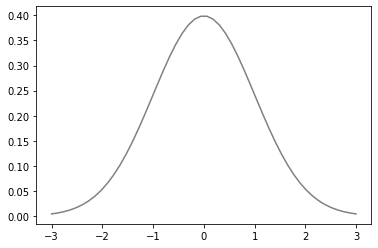

###Kernel density estination KDE

In [ ]:
import seaborn as sns
sns.kdeplot(sample)

Distribution of income

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

In [ ]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

Comparing CDFs

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:
```
# Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)
```
dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.

Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.

In [ ]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

Comparing PDFs
In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:
```
from scipy.stats import norm
dist = norm(mean, std)
```
Just as all norm objects have a .cdf() method, they also have a .pdf() method.

To create a KDE plot, you can use Seaborn's kdeplot() function. Here, Seaborn has been imported for you as sns.

In [ ]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)
# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()